In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
from emnist import list_datasets
from emnist import extract_training_samples


In [2]:
# list_datasets()

In [11]:
images, labels = extract_training_samples('balanced')
images.shape,labels.shape


((112800, 28, 28), (112800,))

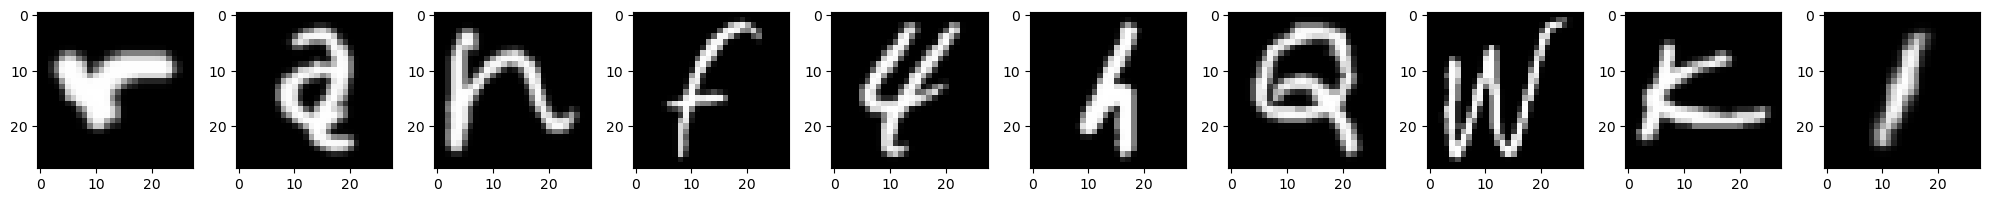

In [4]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(images[i], cmap='gray')

plt.tight_layout()
plt.show()
     

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

In [6]:
y_train.min()

0

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
# Configuration des couches du réseau
model = keras.Sequential([

    
    keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(47, activation="softmax"),

])

In [15]:
# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(X_train, y_train, epochs=10)
     

Epoch 1/10
2362/2362 [==============================] - 27s 11ms/step - loss: 0.7108 - accuracy: 0.7728
Epoch 2/10
2362/2362 [==============================] - 25s 11ms/step - loss: 0.3978 - accuracy: 0.8587
Epoch 3/10
2362/2362 [==============================] - 25s 11ms/step - loss: 0.3372 - accuracy: 0.8751
Epoch 4/10
2362/2362 [==============================] - 25s 11ms/step - loss: 0.2971 - accuracy: 0.8871
Epoch 5/10
2362/2362 [==============================] - 26s 11ms/step - loss: 0.2679 - accuracy: 0.8953
Epoch 6/10
2362/2362 [==============================] - 25s 11ms/step - loss: 0.2400 - accuracy: 0.9042
Epoch 7/10
2362/2362 [==============================] - 26s 11ms/step - loss: 0.2200 - accuracy: 0.9118
Epoch 8/10
2362/2362 [==============================] - 25s 11ms/step - loss: 0.2009 - accuracy: 0.9169
Epoch 9/10
2362/2362 [==============================] - 25s 11ms/step - loss: 0.1870 - accuracy: 0.9233
Epoch 10/10
2362/2362 [==============================] - 26s 11m

In [1]:

# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

NameError: name 'model' is not defined

In [13]:

# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:10])
print(y_test[:10])

1164/1164 [==============================] - 5s 4ms/step
[12 28 17 29 30  3  7  8 10 34]
[12 28  4 29 30  3  7  8 10 33]


In [ ]:
import pickle

# open a file, where you ant to store the data
file = open('../trained_model/mnist_balanced', 'wb')

# dump information to that file
pickle.dump(prediction_model, file)

# close the file
file.close()